In [17]:

# Fetching Forex Rates

Fetching historical daily rates for **AUDUSD** (Austarlian Dollar / US Dollar).

Using [AlphaVantage Service](https://alphavantage.co) and [alpha_vantage package](https://github.com/RomelTorres/alpha_vantage/).

## Prepare API Keys

Firstly, [get an API Key from AlphaVantage](https://www.alphavantage.co/support/#api-key). 
Secondly, [Set & Get API Keys from environment variable](https://stackoverflow.com/a/5971326/3381997). 


In [12]:
import os, sys

api_key = "demo"
try:  
   api_key = os.environ["ALPHAVANTAGE_API_KEY"]
   print("Found AlphaVantage API Key")
except KeyError: 
   print("Please set the environment variable ALPHAVANTAGE_API_KEY")
   sys.exit(1)

Found AlphaVantage API Key



## Getting Data via REST API

For more info, please visit [AlphaVantage Docs](https://www.alphavantage.co/documentation/).

### Getting Data


In [43]:

import pandas as pd
import requests, io

base_url = 'https://www.alphavantage.co'
api_function = 'FX_DAILY'
from_symbol = 'AUD' # AUDUSD
to_symbol = 'USD' # AUDUSD
data_type = 'csv'
output_size = 'full'
symbol = 'AUDUSD'

# Building api_url
api_url = '{}/query?function={}&from_symbol={}&to_symbol={}&outputsize={}&apikey={}&datatype={}'.format(base_url,
                                                                                                        api_function,
                                                                                                        from_symbol,
                                                                                                        to_symbol,
                                                                                                        api_key,
                                                                                                        output_size,
                                                                                                        data_type)

# Getting Data
raw_data = requests.get(api_url)
AUDUSD_csv = raw_data.content
AUDUSD_df = pd.read_csv(io.StringIO(AUDUSD_csv.decode('utf-8')))


### Processing Data


In [50]:

AUDUSD_df['pre_close'] = AUDUSD_df.close.shift(1)
AUDUSD_df['p_change'] = AUDUSD_df.close / AUDUSD_df.pre_close - 1
AUDUSD_df = AUDUSD_df.iloc[1:]



### Sorting Data


In [51]:

# Sorting Data by dates
AUDUSD_df = AUDUSD_df.sort_values('timestamp', ascending=True)

# Save & Print
AUDUSD_df.to_csv('../gen/AUDUSD_Daily_df.csv')
AUDUSD_df.head()


,timestamp,open,high,low,close,pre_close,p_change
4999,2001-05-10,0.5233,0.5267,0.5217,0.5237,0.5233,0.000764
4998,2001-05-11,0.5237,0.5252,0.5184,0.5216,0.5237,-0.004010
4997,2001-05-14,0.5213,0.5224,0.5154,0.5193,0.5216,-0.004410
4996,2001-05-15,0.5193,0.5212,0.5150,0.5206,0.5193,0.002503
4995,2001-05-16,0.5209,0.5240,0.5182,0.5233,0.5206,0.005186



## Getting Data via `alpha_vantage` package

Getting data via REST API can get messy sometime. Instead, We can use `alpha_vantage` package to get this done easily.

Visit [`alpha_vantage` Docs](https://github.com/RomelTorres/alpha_vantage/). 


In [33]:

from alpha_vantage.foreignexchange import ForeignExchange
import matplotlib.pyplot as plt

fx = ForeignExchange(key=api_key, 
                     output_format='pandas',
                     indexing_type='date')
data_df, meta_data = fx.get_currency_exchange_daily(from_symbol=from_symbol,
                                                      to_symbol=to_symbol,
                                                      outputsize=output_size)
data_df = data_df.sort_values('date', ascending=True)

# Save & Print
print("meta_data: {}".format(meta_data))
data_df.head()


meta_data: {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'AUD', '3. To Symbol': 'USD', '4. Output Size': 'Full size', '5. Last Refreshed': '2019-06-15 05:00:00', '6. Time Zone': 'GMT+8'}


,1. open,2. high,3. low,4. close
date,,,,
2001-05-09,0.5152,0.5241,0.5144,0.5233
2001-05-10,0.5233,0.5267,0.5217,0.5237
2001-05-11,0.5237,0.5252,0.5184,0.5216
2001-05-14,0.5213,0.5224,0.5154,0.5193
2001-05-15,0.5193,0.5212,0.5150,0.5206



## Plotting Data

Plotting close data.


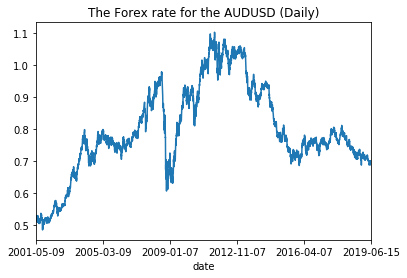

In [52]:

data_df['4. close'].plot()
plt.title('The Forex rate for the AUDUSD (Daily)')
plt.show()


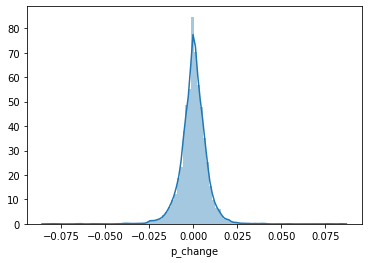

In [57]:
import seaborn as sns

sns.distplot(AUDUSD_df['p_change'],
             bins=100)